<i><h1 align='center' style='color:#a8dadc'>Seaborn's FacetGrid</h1></i>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', color_codes=True)

%matplotlib inline

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

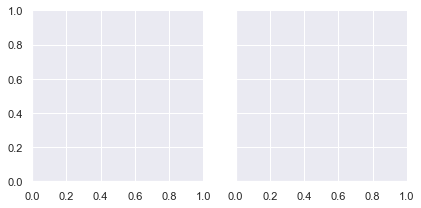

In [4]:
g = sns.FacetGrid(df, col='time')

#### The size of facets are adjusted using **height** and **aspect** parameters.

- Height is the height of facets in inches
- Aspect is the ratio of width and height (width=aspect*height). Default value of aspect is 1.

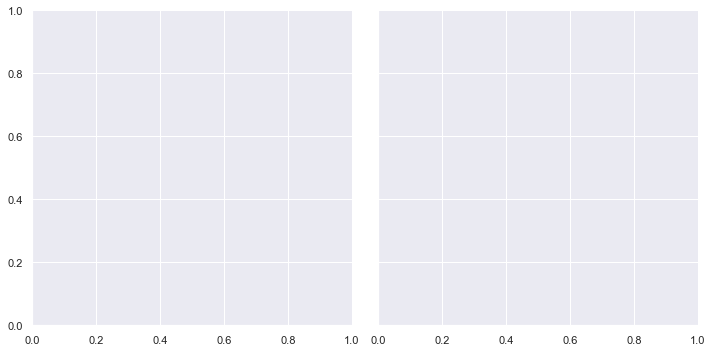

In [5]:
g = sns.FacetGrid(df, col='time', height=5)

''

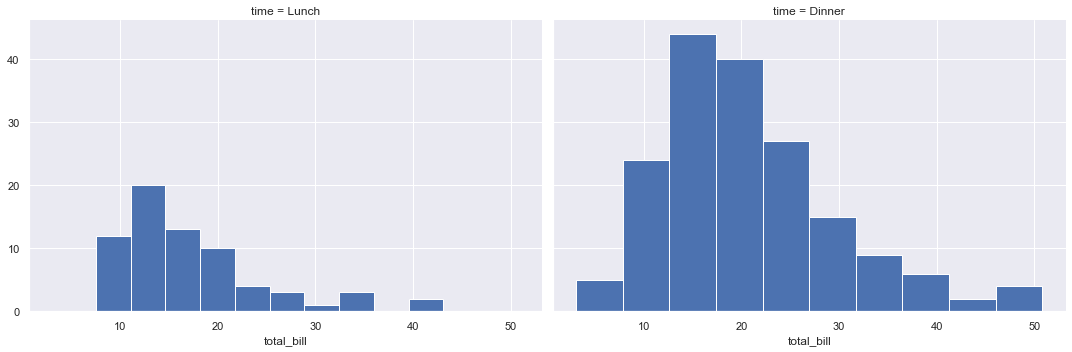

In [6]:
g = sns.FacetGrid(df, col='time', height=5, aspect=1.5)
g.map(plt.hist, "total_bill")
plt.savefig('hist1.png')
;

''

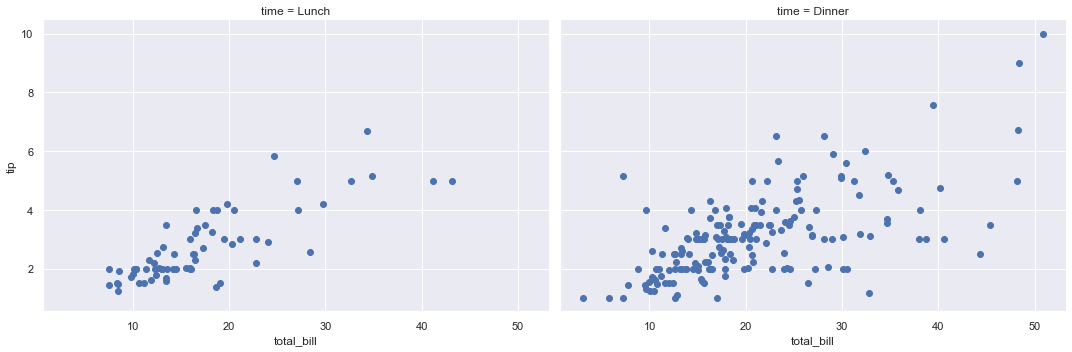

In [7]:
g = sns.FacetGrid(df, col='time', height=5, aspect=1.5)
g.map(plt.scatter, "total_bill", "tip")
plt.savefig('scat1.png')
;

''

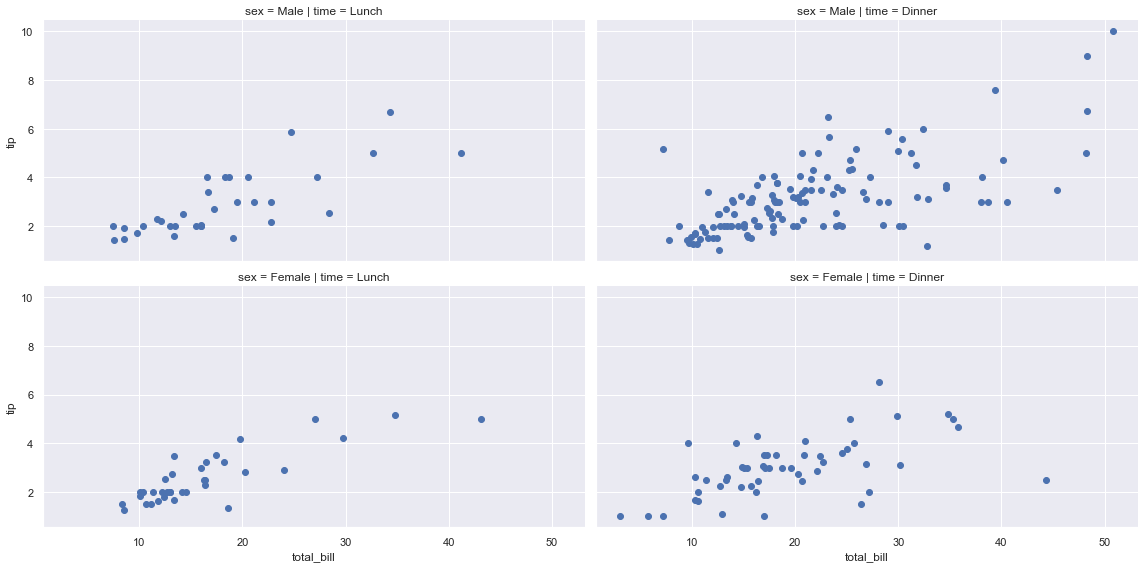

In [8]:
g = sns.FacetGrid(df, row='sex', col='time', height=4, aspect=2)
g.map(plt.scatter, "total_bill", "tip")
plt.savefig('scat2.png')
;

''

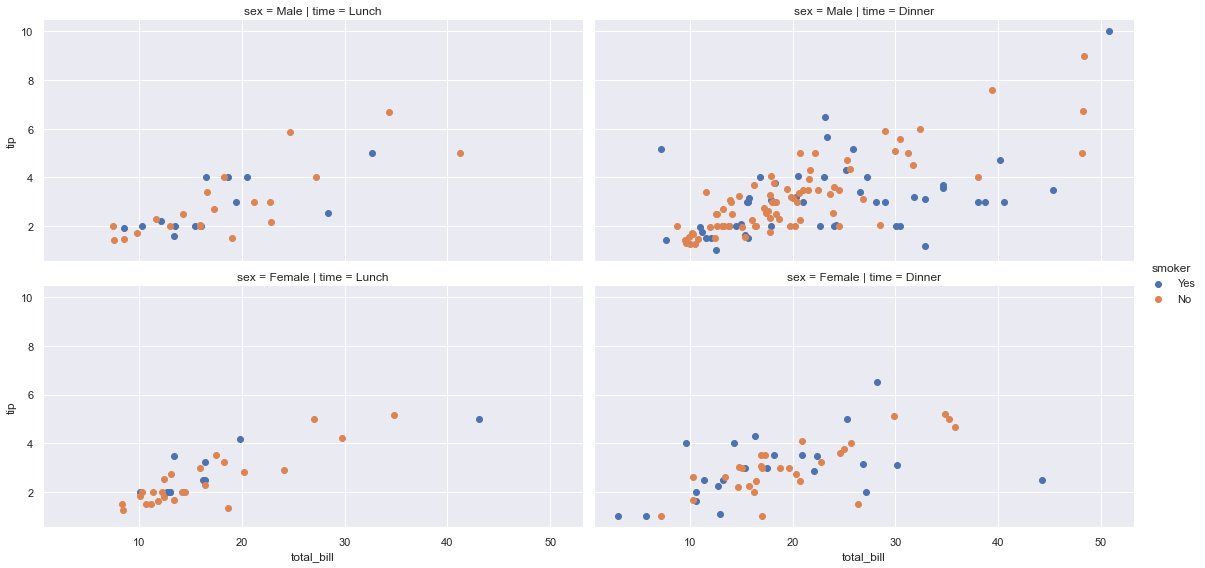

In [9]:
g = sns.FacetGrid(df, row='sex', col='time', hue='smoker',
                  height=4, aspect=2)
g.map(plt.scatter, "total_bill", "tip")
g.add_legend()
plt.savefig('scat3.png')
;

In [10]:
df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

''

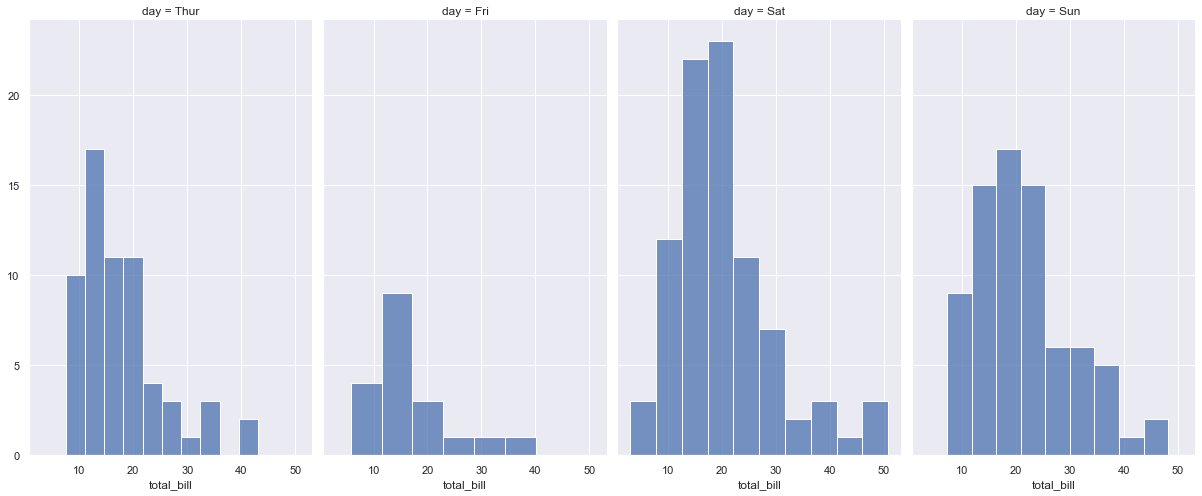

In [11]:
g = sns.FacetGrid(df, col="day", height=7, aspect=0.6)
g.map(sns.histplot, "total_bill")
plt.savefig('hist2.png')
;

''

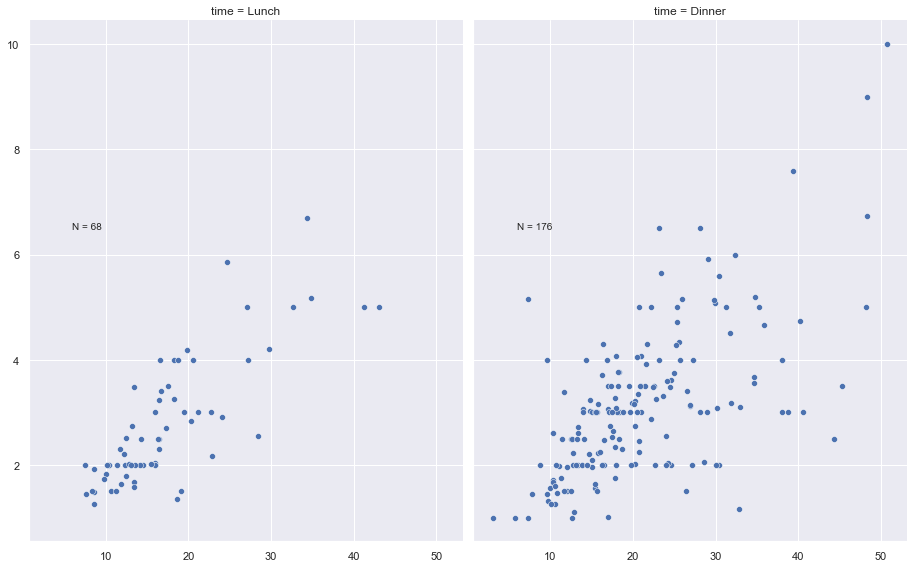

In [12]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.1, .6, f"N = {n}", transform=ax.transAxes)

g = sns.FacetGrid(df, col="time", height=8, aspect=0.8)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.set_axis_labels("Total bill", "Tip")
g.map_dataframe(annotate)
plt.savefig('scat4.png')
;